In [9]:
from math import erf, pi, e
import numpy as np
import matplotlib.pyplot as plt

In [43]:
inps = np.linspace(0, 5, 1000)
f = lambda x: (2/pi)**0.5 * e**(-2*x*x) * erf(x*(2**0.5))

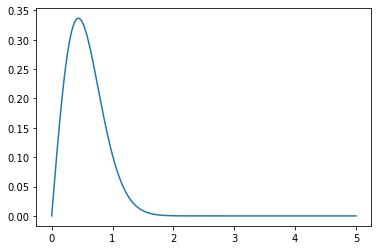

In [44]:
plt.plot(inps, [f(x) for x in inps])

In [46]:
.42*pi**-0.5

0.23695962509005764

In [45]:
f(.43)

0.33637054899797125

In [18]:
g = lambda x: x - x**0.8

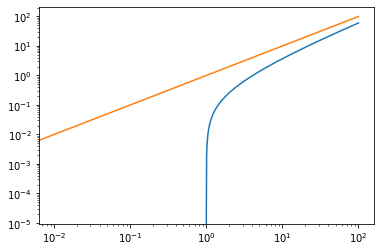

In [39]:
inps = np.linspace(0, 100, 10000)
plt.loglog(inps, g(inps))
plt.loglog(inps, inps)

Sample from any symmetric distribution

In [164]:
# take any symmetric distribution with std dev s
# sample a, b

def f(a, b, s, z):
    c = 1/(s*2**0.5)
    e1 = e**(-(c*a/z)**2)
    e2 = e**(-(c*b/z)**2)
    return c*(b*erf(c*b/z)*e1 + a*erf(c*a/z)*e2)

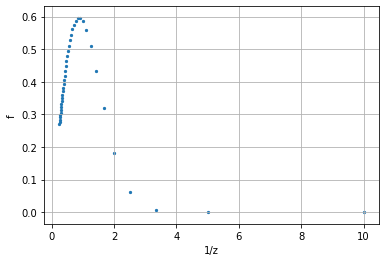

In [340]:
# hrss
get_hrss = lambda: 2*np.random.randint(0,2) - 1
s = 1
N = 100
zs = np.linspace(1/10, 4, 40)
arr = np.zeros((len(zs),))
for _ in range(N):
    a = get_hrss()
    b = get_hrss()
    arr += [f(a,b,s,z) for z in zs]
arr = arr/N
plt.scatter(1/zs, [f(a,b,s,z) for z in zs], s=5)
plt.xlabel("1/z")
plt.ylabel("f")
plt.grid()

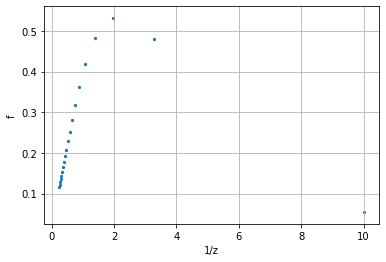

In [342]:
# uniform
get_uniform = lambda: 2*np.random.random() - 1
s = 3**-0.5
N = 100000
zs = np.linspace(1/10, 4, 20)
arr = np.zeros((len(zs),))
for _ in range(N):
    a = get_uniform()
    b = get_uniform()
    arr += [f(a,b,s,z) for z in zs]
arr = arr/N
plt.scatter(1/zs, [f(a,b,s,z) for z in zs], s=5)
plt.xlabel("1/z")
plt.ylabel("f")
plt.grid()

In [339]:
# this was a cool strategy, but I think it varies too much...